## Unit Root Testing

**Functions**

`sm.tsa.stattools.adfuller`, `arch.unitroot.ADF` 

### Exercise 48
Download data on the AAA and BAA yields (Moodys) from FRED and construct the
default premium as the difference between these two.

1. Test the default premium for a unit root. 
2. If you find a unit root, test the change.

In [1]:
import pandas as pd
import pandas_datareader as pdr

# Conservative start date to get all data
aaa = pdr.get_data_fred("AAA", start="1950")
baa = pdr.get_data_fred("BAA", start="1950")

default = aaa["AAA"] - baa["BAA"]
default.name = "Default"

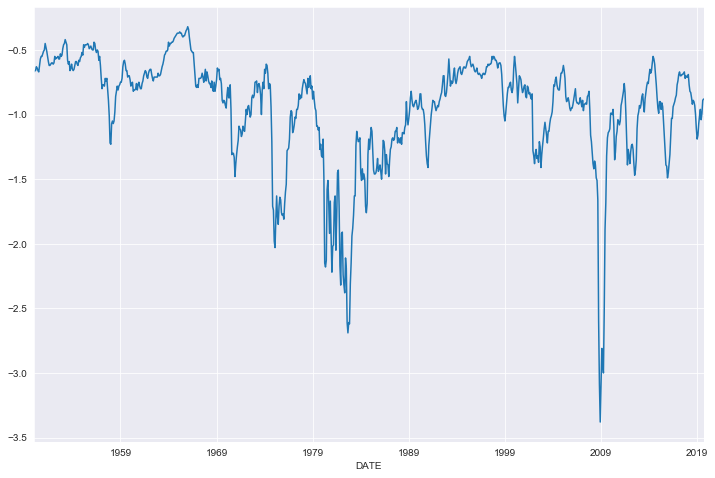

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.rc("figure", figsize=(12,8))

default.plot.line()

In [3]:
from arch.unitroot import ADF

adf = ADF(default, trend='ct')
adf.summary()

Test Statistic,-3.652
P-value,0.026
Lags,17


In [4]:
adf.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     9.941
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           1.57e-26
Time:                        17:23:24   Log-Likelihood:                 766.23
No. Observations:                 819   AIC:                            -1492.
Df Residuals:                     799   BIC:                            -1398.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0352      0.010     -3.652      0.000      -0.054      -0.016
Diff.L1        0.3652      0.035     10.298      0.000       0.296       0.435
Diff.L2       -0.1072      0.037     -2.860      0.004      -0.181      -0.034
Diff.L3        0.0059      0.038      0.157      0.875      -0.068       0.080
Diff.L4        0.0073      0.038      0.195      0.846      -0.066       0.081
Diff.L5        0.1380      0.037      3.686      0.000       0.065       0.212
Diff.L6       -0.0609      0.038     -1.616      0.107      -0.135       0.013
Diff.L7       -0.0842      0.038     -2.232      0.026      -0.158      -0.010
Diff.L8       -0.0038      0.038     -0.101      0.920      -0.078       0.070
Diff.L9        0.0585      0.038      1.557      0.120      -0.015       0.132
Diff.L10      -0.0833      0.038     -2.212      0.027      -0.157      -0.009
Diff.L11       0.0654      0.038      1.742      0.082      -0.008       0.139
Diff.L12      -0.0380      0.037     -1.015      0.310      -0.112       0.035
Diff.L13      -0.0463      0.037     -1.240      0.215      -0.119       0.027
Diff.L14       0.0897      0.037      2.404      0.016       0.016       0.163
Diff.L15      -0.0401      0.037     -1.070      0.285      -0.114       0.033
Diff.L16      -0.0910      0.037     -2.450      0.014      -0.164      -0.018
Diff.L17       0.0544      0.035      1.536      0.125      -0.015       0.124
const         -0.0290      0.010     -2.909      0.004      -0.049      -0.009
trend      -1.283e-05    1.5e-05     -0.858      0.391   -4.22e-05    1.65e-05
==============================================================================
Omnibus:                      383.285   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8901.963
Skew:                          -1.581   Prob(JB):                         0.00
Kurtosis:                      18.839   Cond. No.                     7.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
adf = ADF(default, trend='c')
adf.summary()

Test Statistic,-3.562
P-value,0.007
Lags,17


In [6]:
adf.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     10.46
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           6.64e-27
Time:                        17:23:24   Log-Likelihood:                 765.85
No. Observations:                 819   AIC:                            -1494.
Df Residuals:                     800   BIC:                            -1404.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0326      0.009     -3.562      0.000      -0.051      -0.015
Diff.L1        0.3634      0.035     10.268      0.000       0.294       0.433
Diff.L2       -0.1091      0.037     -2.916      0.004      -0.182      -0.036
Diff.L3        0.0042      0.038      0.113      0.910      -0.069       0.078
Diff.L4        0.0055      0.037      0.147      0.883      -0.068       0.079
Diff.L5        0.1364      0.037      3.647      0.000       0.063       0.210
Diff.L6       -0.0625      0.038     -1.662      0.097      -0.136       0.011
Diff.L7       -0.0858      0.038     -2.278      0.023      -0.160      -0.012
Diff.L8       -0.0051      0.038     -0.137      0.891      -0.079       0.069
Diff.L9        0.0571      0.038      1.520      0.129      -0.017       0.131
Diff.L10      -0.0847      0.038     -2.253      0.025      -0.159      -0.011
Diff.L11       0.0642      0.037      1.711      0.087      -0.009       0.138
Diff.L12      -0.0392      0.037     -1.047      0.295      -0.113       0.034
Diff.L13      -0.0476      0.037     -1.276      0.202      -0.121       0.026
Diff.L14       0.0885      0.037      2.374      0.018       0.015       0.162
Diff.L15      -0.0413      0.037     -1.104      0.270      -0.115       0.032
Diff.L16      -0.0920      0.037     -2.480      0.013      -0.165      -0.019
Diff.L17       0.0529      0.035      1.496      0.135      -0.016       0.122
const         -0.0318      0.009     -3.376      0.001      -0.050      -0.013
==============================================================================
Omnibus:                      383.084   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9005.624
Skew:                          -1.576   Prob(JB):                         0.00
Kurtosis:                      18.936   Cond. No.                         23.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise 49

Download data on consumer prices in the UK from the ONS.

1. Test the log of CPI for a unit root. 
2. If you find a unit root, test inflation for one.

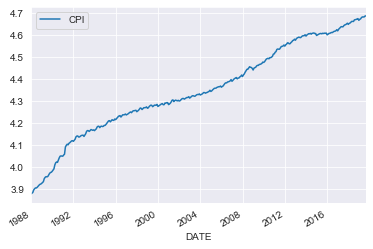

In [7]:
import numpy as np

cpi = pd.read_excel("data/uk-cpi-ons.xlsx", index_col="DATE")
lncpi = np.log(cpi)
lncpi.plot.line()

In [8]:
adf = ADF(lncpi, trend="ct")
adf.summary()

Test Statistic,-3.972
P-value,0.010
Lags,14


In [9]:
adf.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     35.38
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           3.66e-63
Time:                        17:23:24   Log-Likelihood:                 1668.8
No. Observations:                 366   AIC:                            -3304.
Df Residuals:                     349   BIC:                            -3237.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0200      0.005     -3.972      0.000      -0.030      -0.010
Diff.L1        0.0845      0.052      1.615      0.107      -0.018       0.187
Diff.L2        0.0731      0.052      1.406      0.161      -0.029       0.175
Diff.L3       -0.0121      0.037     -0.325      0.745      -0.085       0.061
Diff.L4       -0.0073      0.037     -0.196      0.845      -0.080       0.066
Diff.L5       -0.0623      0.037     -1.680      0.094      -0.135       0.011
Diff.L6        0.1141      0.037      3.063      0.002       0.041       0.187
Diff.L7        0.0251      0.038      0.666      0.506      -0.049       0.099
Diff.L8        0.0085      0.038      0.226      0.821      -0.066       0.083
Diff.L9       -0.0385      0.037     -1.030      0.304      -0.112       0.035
Diff.L10      -0.0200      0.037     -0.535      0.593      -0.093       0.054
Diff.L11       0.0230      0.037      0.614      0.539      -0.051       0.096
Diff.L12       0.6888      0.037     18.498      0.000       0.616       0.762
Diff.L13      -0.1277      0.052     -2.447      0.015      -0.230      -0.025
Diff.L14      -0.1137      0.052     -2.167      0.031      -0.217      -0.011
const          0.0819      0.020      4.009      0.000       0.042       0.122
trend       3.419e-05      9e-06      3.798      0.000    1.65e-05    5.19e-05
==============================================================================
Omnibus:                       93.523   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1069.844
Skew:                           0.695   Prob(JB):                    4.86e-233
Kurtosis:                      11.260   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
import statsmodels.tsa.api as tsa
with_trend = tsa.add_trend(lncpi, trend="ct")
with_trend.head()

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,CPI,const,trend
DATE,,,
1988-01-01,3.879397,1.0,1.0
1988-02-01,3.882615,1.0,2.0
1988-03-01,3.886028,1.0,3.0
1988-04-01,3.897518,1.0,4.0
1988-05-01,3.902558,1.0,5.0


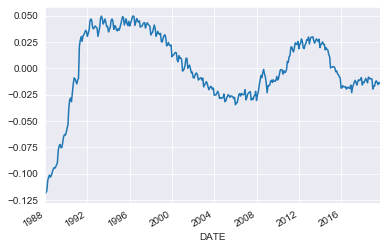

In [11]:
import statsmodels.api as sm
res = sm.OLS(with_trend["CPI"], with_trend[["const", "trend"]]).fit()

res.resid.plot.line()